# PRODIGY_ML_01

Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.

In [78]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing


import warnings
warnings.filterwarnings('ignore')

In [79]:
data = pd.read_csv(r"C:\\Users\\KARTHIK\\Downloads\\housing_price_dataset.csv")

In [80]:
data.head(5)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


### Extracting Necessary columns:

In [81]:
df = data[['SquareFeet','Bedrooms','Bathrooms','Price']]
df.head(5)

,SquareFeet,Bedrooms,Bathrooms,Price
0,2126,4,1,215355.283618
1,2459,3,2,195014.221626
2,1860,2,1,306891.012076
3,2294,2,1,206786.787153
4,2130,5,2,272436.239065


In [82]:
df.count()

SquareFeet    50000
Bedrooms      50000
Bathrooms     50000
Price         50000
dtype: int64

In [83]:
df.shape

(50000, 4)

In [84]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,Price
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,224827.325151
std,575.513241,1.116326,0.815851,76141.842966
min,1000.000000,2.000000,1.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,169955.860225
50%,2007.000000,3.000000,2.000000,225052.141166
75%,2506.000000,4.000000,3.000000,279373.630052
max,2999.000000,5.000000,3.000000,492195.259972


### Missingness Evaluation :

In [85]:
df.isnull().sum()

SquareFeet    0
Bedrooms      0
Bathrooms     0
Price         0
dtype: int64

### Exploratory Data Analysis :

In [86]:
# correlation matrix

corr_matrix = df.corr()
corr_matrix

,SquareFeet,Bedrooms,Bathrooms,Price
SquareFeet,1.000000,-0.002638,-0.003275,0.750720
Bedrooms,-0.002638,1.000000,0.007405,0.072624
Bathrooms,-0.003275,0.007405,1.000000,0.028418
Price,0.750720,0.072624,0.028418,1.000000


### Reg plot

Corelation:
            SquareFeet    Price
SquareFeet     1.00000  0.75072
Price          0.75072  1.00000


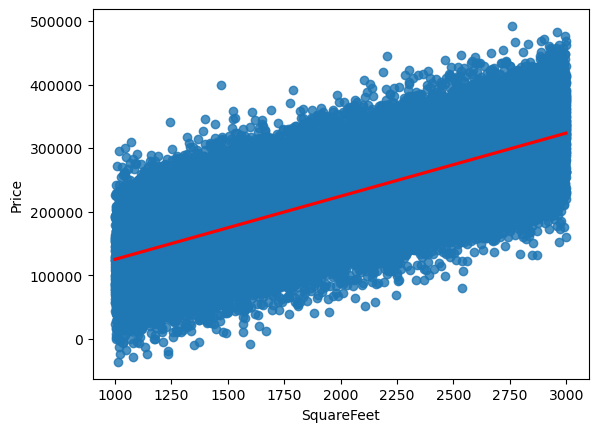

In [87]:
#(i) squarefeet vs price

sns.regplot(x='SquareFeet',y='Price',data=df,line_kws={"color":"red"})

print("Corelation:")
print(df[['SquareFeet','Price']].corr())

Corelation:
          Bedrooms     Price
Bedrooms  1.000000  0.072624
Price     0.072624  1.000000


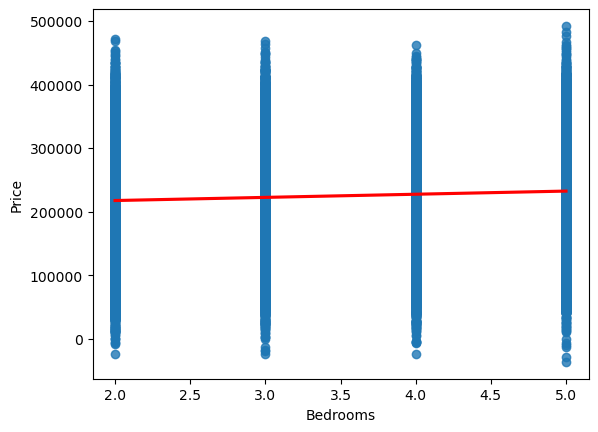

In [88]:
#(ii) Bedrooms vs Price

sns.regplot(x='Bedrooms',y='Price',data=df,line_kws={"color":"red"})
print("Corelation:")
print(df[['Bedrooms','Price']].corr())

Corelation:
           Bathrooms     Price
Bathrooms   1.000000  0.028418
Price       0.028418  1.000000


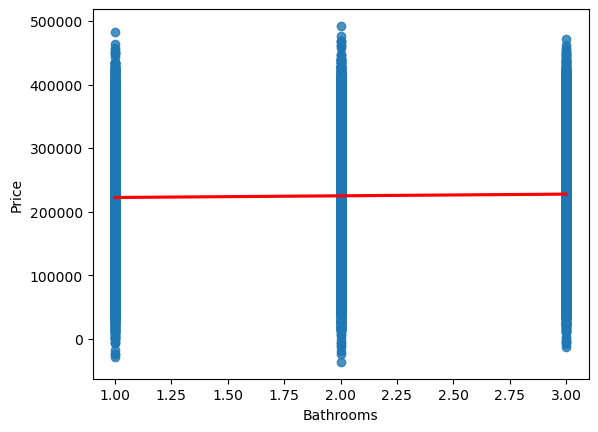

In [89]:
#(ii) Bathrooms vs Price

sns.regplot(x='Bathrooms',y='Price',data=df,line_kws={"color":"red"})
print("Corelation:")
print(df[['Bathrooms','Price']].corr())

### Correlation and Causation :

In [90]:
from scipy import stats

In [91]:
# (i) SquareFeet vs Price

pearson_coef, p_value = stats.pearsonr(df['SquareFeet'],df['Price'])
print("The Pearson Correlation is",pearson_coef," with a p-value of p=",p_value)

The Pearson Correlation is 0.7507197856708842  with a p-value of p= 0.0


#### Conclusion :
        * Since p-value<0.001
        * Therefore there is strong evidence that SquareFeet and Price are statistically significant.
        * Linear relationship quite strong.

In [92]:
# (ii) Bedrooms vs Price

pearson_coef, p_value = stats.pearsonr(df['Bedrooms'],df['Price'])
print("The Pearson Correlation is",pearson_coef," with a p-value of p=",p_value)

The Pearson Correlation is 0.07262393204089636  with a p-value of p= 1.8889710021257402e-59


#### Conclusion :
        * Since p-value<0.001
        * Therefore there is strong evidence that SquareFeet and Price are statistically significant.
        * Although Linear relationship is not strong.

In [93]:
# (iii) Bathrooms vs Price

pearson_coef, p_value = stats.pearsonr(df['Bathrooms'],df['Price'])
print("The Pearson Correlation is",pearson_coef," with a p-value of p=",p_value)

The Pearson Correlation is 0.02841764814765268  with a p-value of p= 2.0774452963500685e-10


#### Conclusion :
        * Since p-value<0.001
        * Therefore there is strong evidence that SquareFeet and Price are statistically significant.
        * Although Linear relationship not strong.

### Heatmap :

<AxesSubplot:>

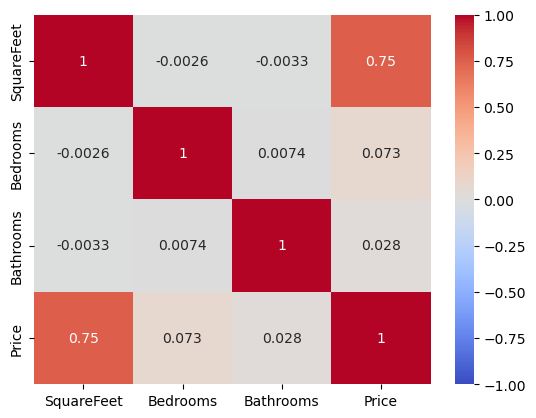

In [94]:
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',vmin=-1,vmax=1)

### Model Development :

In [95]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [96]:
x = df[['SquareFeet','Bedrooms','Bathrooms']]
y = df[['Price']]

In [97]:
# Normalize features

scaler = StandardScaler()
x= scaler.fit_transform(x)

In [98]:
# Train Test Split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)

In [99]:
print("Training set: ",x_train.shape,y_train.shape)
print("Testing set: ",x_test.shape,y_test.shape)

Training set:  (40000, 3) (40000, 1)
Testing set:  (10000, 3) (10000, 1)


In [100]:
# Fit

model=linear_model.LinearRegression()
model.fit(x_train,y_train)

print("Intercept: ",model.intercept_)
print("Slope: ",model.coef_)

Intercept:  [224878.31925467]
Slope:  [[57322.15631229  5674.16535256  2287.615717  ]]


In [101]:
y_hat = model.predict(x_test)

### Predicted Values :

In [102]:
y_hat[0:5]

array([[245031.61787871],
       [126815.00728295],
       [207665.45495278],
       [284972.34017301],
       [198100.38438234]])

### Actual Values :

In [103]:
y_test[0:5]

,Price
16477,284799.749382
5969,80398.114859
46459,263017.090128
33297,310995.113061
35047,241081.847555


### Model Evaluation :

In [104]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

### r2_score

In [105]:
print("Score: ",model.score(x_test,y_test))
print("r2_score :",r2_score(y_test,y_hat))

Score:  0.567814249229099
r2_score : 0.567814249229099


### k fold cross validation


In [106]:
Rcross = cross_val_score(model,df[['SquareFeet','Bedrooms','Bathrooms']],df[['Price']],cv=4)
Rcross

array([0.56233773, 0.56996527, 0.57663303, 0.57099809])

In [108]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.5699835317471991 and the standard deviation is 0.005091752146737245
